# Data Dictionary

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
#Importing the libraries to load and manipulate the data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)

In [ ]:
from sklearn.linear_model import LinearRegression
import missingno as msno

In [ ]:
#df_t=pd.read_csv("train_bike.csv", parse_dates=True, index_col=0)
#df_te=pd.read_csv("test_bike.csv")

In [ ]:
df_r=pd.read_csv("train_bike.csv")

FileNotFoundError: ignored

In [ ]:
df=df_r.copy()

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

In [ ]:
np.random.seed(42)

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
print(f'There are {df.shape[0]} Rows and {df.shape[1]} columns')

There are 10886 Rows and 12 columns


In [ ]:
df.isnull().sum().sort_values(ascending=False)

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [ ]:
df.duplicated().sum()

0

- There are no duplicated values

In [ ]:
# checking the value_counts for few columns which look like categorical variables 

In [ ]:
cat_cols=['season','holiday','workingday','weather']

for column in cat_cols:
    print(df[column].value_counts())
    print('-'*30)

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64
------------------------------
0    10575
1      311
Name: holiday, dtype: int64
------------------------------
1    7412
0    3474
Name: workingday, dtype: int64
------------------------------
1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64
------------------------------


In [ ]:
#converting the season and weather columns values in meaningful categories
season_type ={1: 'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}
weather_type = {1: 'Good', 2: 'Gloomy', 3: 'Light Snow/Rain', 4: 'Heavy Snow/Rain'}

In [ ]:
df['season'] = df['season'].map(season_type)
df['weather'] = df['weather'].map(weather_type)

In [ ]:
#Changing the the columsn into categories
cat_cols=['season', 'weather', 'holiday', 'workingday']
df[cat_cols] = df[cat_cols].astype('category')

# Exploratory Data Analysis

In [ ]:
count_cols=['temp', 'atemp','humidity', 'windspeed', 'casual', 'registered']
for column in count_cols:
    plt.figure(figsize=(15,7))
    sns.distplot(df[column])
    plt.show()

In [ ]:
for column in count_cols:
    plt.figure(figsize=(15,7))
    sns.boxplot(df[column])
    plt.show()

In [ ]:
for column in cat_cols:
    plt.figure(figsize=(12,7))
    sns.countplot(df[column])
    plt.show()

In [ ]:
#df[cat_cols]=df[cat_cols].astype('category')

In [ ]:
df.index.year

In [ ]:
df['day']=df.index.day_name()

In [ ]:
import datetime

In [ ]:
df['temp'].rolling(72).mean().plot()

In [ ]:
dr=pd.date_range(start='01/01/2011', periods=20)

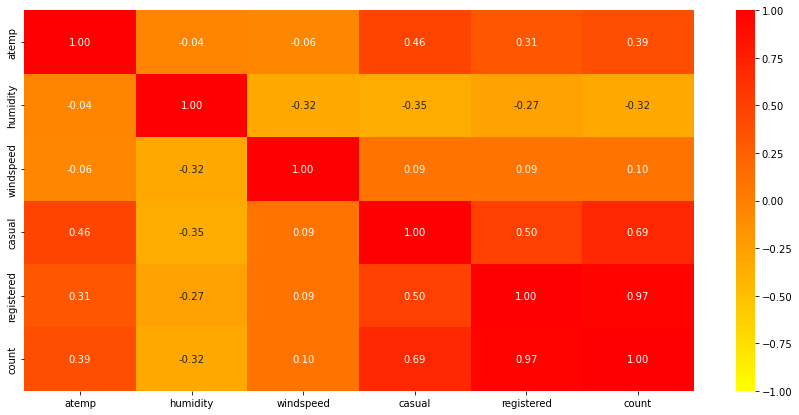

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), vmax=1, vmin=-1, annot=True, cmap='autumn_r', fmt='.2f')
plt.show()

- registerd and count has good positive relationship
- casual and count has mode relationship
- temp and atemp are highly correlated and I would remove one variable, specially I would remove temp variable because feel tempareature is more important than actual temp

In [ ]:
drop_col = ['registered', 'casual']

In [ ]:
df=df.drop(drop_col, axis=1)

In [ ]:
df=df.drop('datetime', axis=1)

In [ ]:
df.head()

,season,holiday,workingday,weather,atemp,humidity,windspeed,count
0,Spring,0,0,Good,14.395,81,0.0,16
1,Spring,0,0,Good,13.635,80,0.0,40
2,Spring,0,0,Good,13.635,80,0.0,32
3,Spring,0,0,Good,14.395,75,0.0,13
4,Spring,0,0,Good,14.395,75,0.0,1


In [ ]:
sns.scatterplot(data=df, x="registered", y="count", legend="full")

In [ ]:
sns.scatterplot(data=df, x="casual", y="count", legend="full")

- There are 7 percent of outliers in casual data. However, as there are no error, these should not considered as outliers, rather these are natural data

- recommendations:
- try to configure to make the realtionship with the weather pattern and changes in counts
- there are three dependent variables, isn't better one
- differentiate between work day and holiday or weekend
- hourly trend
- outliers are natural, not due to errors, so log transformation is used to treat
- daily trend
- check demand over year
- creating new variable, hour bins
- day bins, temp bins
- day type, weekend, holiday, weekday
- polynomial features

In [ ]:
#putting test data in categorical
#testdata['season'] = testdata['season'].map(season_dict)
#testdata['weather'] = testdata['weather'].map(weather_dict)

In [ ]:
msno.matrix(df)

In [ ]:
df_wd1 = df[df.workingday == 1]

df_wd0 = df[df.workingday == 0]


In [ ]:
df_wd1.columns

In [ ]:
bin_size = 4
df_wd1['temp'] = df_wd1['temp']//bin_size
df_wd0['temp'] = df_wd0['temp']//bin_size

In [ ]:
df_wd1.groupby('temp')['count', 'workingday'].mean()

In [ ]:
df_wd1_gb

In [ ]:
df_gb = df.groupby('temp')['weather', 'season']
df_gb

In [ ]:
for i, subframes in df_gb:
    print(i), 
    print(subframes),
    print('\n')

In [ ]:
df.head()

In [ ]:
df['temp'].describe()

In [ ]:
df['season'].head(50)

In [ ]:
t = df[df['count'==1]]

In [ ]:
t = df[df.workingday == 1]

In [ ]:
t1 = t.groupby(["weather", "season"])["count"].mean().plot(kind='bar')

In [ ]:
for i, subgroup in t2:
    print(i),
    print(subgroup),
    print("\n")

In [ ]:
t3 = t.groupby(["season"])["count"].count().plot.barh()

In [ ]:
df['count'].head()

# Data Preprocessing and Model Building 

In [ ]:
#Droping the columns which are unnecessary for model building 
col_drop = ['temp', 'casual', 'registered', 'datetime']
df=df.drop(col_drop, axis=1)

In [ ]:
#Definning the variable X and y
X=df.drop('count', axis=1)
y=df.pop('count')

In [ ]:
#Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(8708, 7)

In [ ]:
y_train.shape

(8708,)

In [ ]:
X_test.shape

(2178, 7)

In [ ]:
y_test.shape

(2178,)

In [ ]:
#Creating the dummies for categorical variable
X_train=pd.get_dummies(X_train, drop_first=True)
X_test=pd.get_dummies(X_test, drop_first=True)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import RobustScaler
rc=RobustScaler()
X_train = rc.fit_transform(X_train)
X_test = rc.transform(X_test)

# Building Linear Regresion model

In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
lr.score(X_train, y_train)

0.27094969465032637

In [ ]:
rf=RandomForestClassifier()

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
rf.score(X_train, y_train)

0.8295819935691319

# Random Forest Classifier

In [ ]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

#Calculating different metrics
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator, X_train,y_train)
print("Training performance:\n",rf_estimator_model_train_perf)
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator, X_test,y_test)
print("Testing performance:\n",rf_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator,X_test,y_test)

# Random Forest Classifier Tunning

In [ ]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(class_weight={0:0.18,1:0.82},random_state=1,oob_score=True,bootstrap=True)

parameters = {  
                'max_depth': list(np.arange(5,30,5)) + [None],
                'max_features': ['sqrt','log2',None],
                'min_samples_leaf': np.arange(1,15,5),
                'min_samples_split': np.arange(2, 20, 5),
                'n_estimators': np.arange(10,110,10)}


# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring='recall',cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

# Bagging Clasifier

In [ ]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
bagging_classifier_model_train_perf=model_performance_classification_sklearn(bagging_classifier, X_train,y_train)
print("Training performance:\n",bagging_classifier_model_train_perf)
bagging_classifier_model_test_perf=model_performance_classification_sklearn(bagging_classifier, X_test,y_test)
print("Testing performance:\n",bagging_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier,X_test,y_test)

Bagging Classifier Tunning

# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

In [ ]:
Ada Boost Classifier

In [ ]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
ab_classifier_model_train_perf=model_performance_classification_sklearn(ab_classifier, X_train,y_train)
print("Training performance:\n",ab_classifier_model_train_perf)
ab_classifier_model_test_perf=model_performance_classification_sklearn(ab_classifier, X_test,y_test)
print("Testing performance:\n",ab_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(ab_classifier,X_test,y_test)

In [ ]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric= "error")
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
xgb_classifier_model_train_perf=model_performance_classification_sklearn(xgb_classifier, X_train,y_train)
print("Training performance:\n",xgb_classifier_model_train_perf)
xgb_classifier_model_test_perf=model_performance_classification_sklearn(xgb_classifier, X_test,y_test)
print("Testing performance:\n",xgb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier,X_test,y_test)

# XGB Tuned

In [ ]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(10,100,20),
    "scale_pos_weight":[0,1,2,5],
    "subsample":[0.5,0.7,0.9,1],
    "learning_rate":[0.01,0.1,0.2,0.05],
    "gamma":[0,1,3],
    "colsample_bytree":[0.5,0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [d_tree_model_train_perf.T,pruned_dtree_model_train_perf.T, dtree_estimator_model_train_perf.T, rf_estimator_model_train_perf.T,
    rf_tuned_model_train_perf.T,bagging_classifier_model_train_perf.T,bagging_estimator_tuned_model_train_perf.T,ab_classifier_model_train_perf.T,
     abc_tuned_model_train_perf.T,gb_classifier_model_train_perf.T,gbc_tuned_model_train_perf.T,xgb_classifier_model_train_perf.T,
     xgb_tuned_model_train_perf.T, stacking_classifier_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Prunned Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adaboost Classifier Tuned",
     "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
     "XGBoost Classifier",
    "XGBoost Classifier Tuned","Stacking Classifier"]
print("Training performance comparison:")
models_train_comp_df

In [ ]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()